In [1]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [2]:
import keras
keras.__version__

'2.9.0'

In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
print(np.random.randint(10, size=10))

[9 4 0 1 9 0 1 8 9 0]


In [4]:
#import mnist資料集
from keras.datasets import mnist

In [5]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [6]:
print('train data=', len(x_train_image))
print(' test data=', len(x_test_image))

train data= 60000
 test data= 10000


In [7]:
print('x_train_image:', x_train_image.shape)
print(x_train_image.shape[0])
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
60000
y_train_label: (60000,)


In [8]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax= plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([])
        idx+=1
    plt.show()

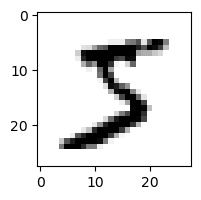

In [9]:
plot_image(x_train_image[0])
# print(x_train_image[0]) //點陣化
# y_train_label[0]
# plot_images_labels_prediction(x_train_image, y_train_label,[],0,10)

In [10]:
# print('x_train_image:', x_train_image.shape)
# print('y_train_label:', y_train_label.shape)

In [11]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test  = x_test_image.reshape(10000,784).astype('float32')
print('x_train:', x_Train.shape)
print('x_ test:', x_Test.shape)

x_train: (60000, 784)
x_ test: (10000, 784)


In [12]:
# x_Train[0]
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [14]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [17]:
y_Test_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# from keras.utils import np_utils
# import numpy as np
# np.random.seed(10)

In [19]:
# from keras.datasets import mnist
# (x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [20]:
# x_Train = x_train_image.reshape(60000,784).astype('float32')
# x_Test = x_test_image.reshape(10000,784).astype('float32')
# x_Train_normalize = x_Train / 255
# x_Test_normalize = x_Test / 255
# y_Train_OneHot = np_utils.to_categorical(y_train_label)
# y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [21]:
# MLP 多元感知器 #Sequential有序的 #Dense稠密的
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# 輸入層。隱藏層。輸出層。超參數
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


2022-11-17 18:33:23.754274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 2s - loss: 0.4322 - accuracy: 0.8855 - val_loss: 0.2151 - val_accuracy: 0.9411 - 2s/epoch - 8ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1883 - accuracy: 0.9463 - val_loss: 0.1598 - val_accuracy: 0.9538 - 1s/epoch - 6ms/step
Epoch 3/10
240/240 - 2s - loss: 0.1355 - accuracy: 0.9612 - val_loss: 0.1304 - val_accuracy: 0.9638 - 2s/epoch - 7ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1048 - accuracy: 0.9698 - val_loss: 0.1156 - val_accuracy: 0.9665 - 1s/epoch - 5ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0830 - accuracy: 0.9770 - val_loss: 0.1041 - val_accuracy: 0.9692 - 1s/epoch - 6ms/step
Epoch 6/10
240/240 - 2s - loss: 0.0672 - accuracy: 0.9814 - val_loss: 0.0927 - val_accuracy: 0.9730 - 2s/epoch - 9ms/step
Epoch 7/10
240/240 - 2s - loss: 0.0567 - accuracy: 0.9840 - val_loss: 0.0855 - val_accuracy: 0.9750 - 2s/epoch - 7ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0461 - accuracy: 0.9877 - val_loss: 0.0849 - val_accuracy: 0.9755 - 1s/epoch - 5ms/step
Epoch 9/10
240/240 - 1s 

In [25]:
# 訓練紀錄
# train_history.history

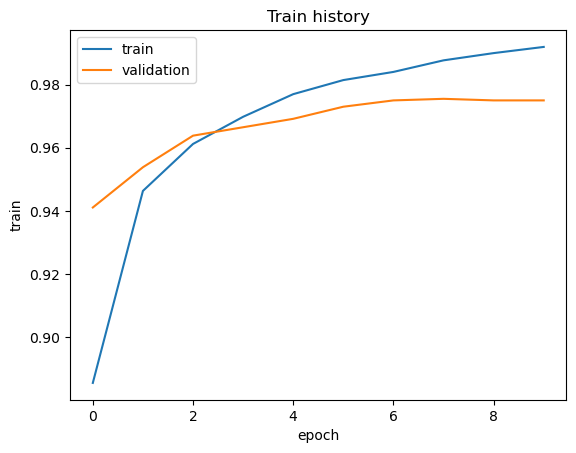

In [26]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()
# overfitting
show_train_history(train_history,'accuracy','val_accuracy')

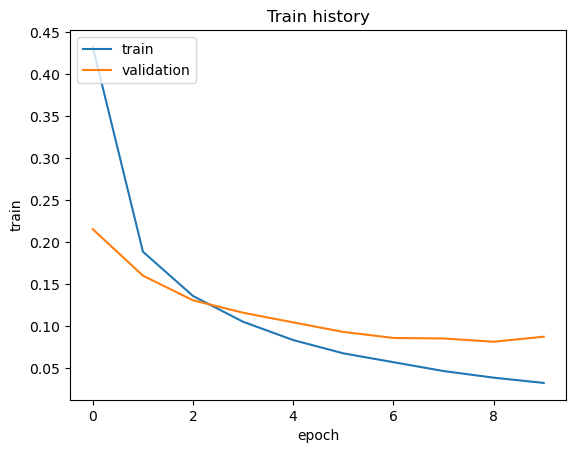

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
model.save('st.h5') #副檔名一定要是h5
print()
print('loss    ',scores[0])
print('accuracy',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9744

loss     0.08303568512201309
accuracy 0.974399983882904


313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


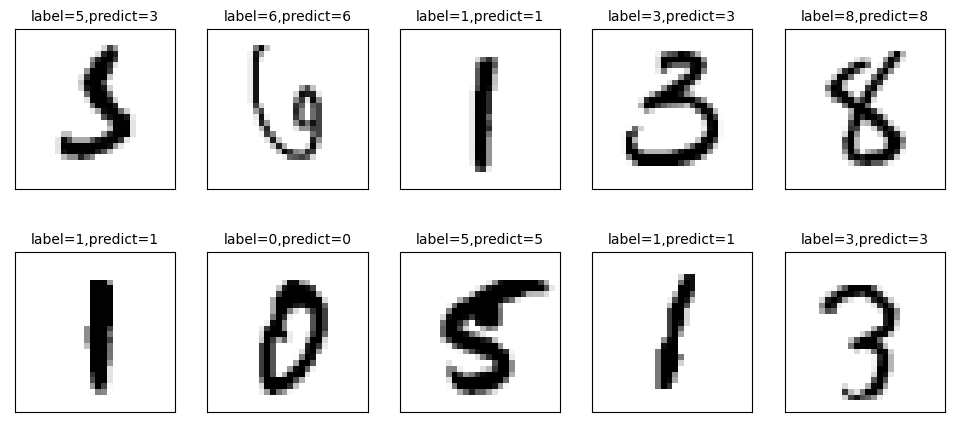

In [29]:
predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)

# prediction=model.predict_classes(x_Test) 已廢棄替換
print(prediction)

plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [30]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,966,1,1,1,1,1,4,1,2,2
1,0,1123,3,2,0,1,2,1,3,0
2,4,3,1001,10,2,0,2,6,4,0
3,0,0,1,994,0,1,0,5,3,6
4,1,0,2,1,966,0,5,3,0,4
5,4,0,0,30,1,839,7,2,6,3
6,5,3,0,1,2,3,942,0,2,0
7,1,5,9,3,0,0,0,1004,1,5
8,6,0,3,18,5,1,3,5,930,3


In [31]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [32]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
412,5,3
1003,5,3
1082,5,3
1393,5,3
1637,5,3
1670,5,3
1970,5,3
2035,5,3
2597,5,3


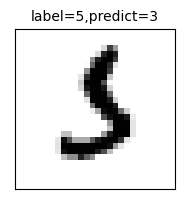

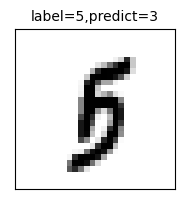

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=4300,num=1)

In [34]:
model= Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 3s - loss: 2.0146 - accuracy: 0.7352 - val_loss: 1.6952 - val_accuracy: 0.8958 - 3s/epoch - 14ms/step
Epoch 2/10
240/240 - 3s - loss: 1.4969 - accuracy: 0.9055 - val_loss: 1.3110 - val_accuracy: 0.9187 - 3s/epoch - 14ms/step
Epoch 3/10
240/240 - 4s - loss: 1.1736 - accuracy: 0.9195 - val_loss: 1.0374 - val_accuracy: 0.9264 - 4s/epoch - 18ms/step
Epoch 4/10
240/240 - 3s - loss: 0.9366 - accuracy: 0.9259 - val_loss: 0.8366 - val_accuracy: 0.9280 - 3s/epoch - 14ms/step
Epoch 5/10
240/240 - 4s - loss: 0.7621 - accuracy: 0.9302 - val_loss: 0.6884 - val_accuracy: 0.9322 - 4s/epoch - 16ms/step
Epoch 6/10
240/240 - 4s - loss: 0.6338 - accuracy: 0.9330 - val_loss: 0.5812 - val_accuracy: 0.9340 - 4s/epoch - 16ms/step
Epoch 7/10
240/240 - 4s - loss: 0.5395 - accuracy: 0.9355 - val_loss: 0.5015 - val_accuracy: 0.9355 - 4s/epoch - 17ms/step
Epoch 8/10
240/240 - 4s - loss: 0.4696 - accuracy: 0.9378 - val_loss: 0.4447 - val_accuracy: 0.9364 - 4s/epoch - 15ms/step
Epoch 9/10
240/2

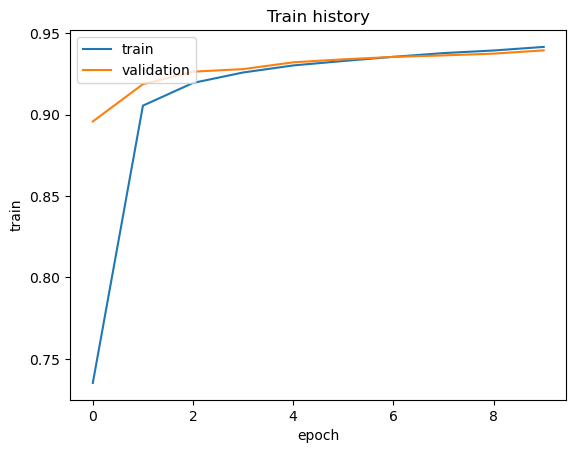

In [36]:
show_train_history(train_history,'accuracy','val_accuracy')

In [37]:
from keras.models import Sequential
from keras.layers import Dense

# 主要加入這個 dropout
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
240/240 - 4s - loss: 2.0590 - accuracy: 0.5506 - val_loss: 1.7589 - val_accuracy: 0.8696 - 4s/epoch - 15ms/step
Epoch 2/10
240/240 - 3s - loss: 1.6472 - accuracy: 0.5365 - val_loss: 1.3925 - val_accuracy: 0.9085 - 3s/epoch - 13ms/step
Epoch 3/10
240/240 - 3s - loss: 1.4556 - accuracy: 0.5440 - val_loss: 1.1675 - val_accuracy: 0.9247 - 3s/epoch - 13ms/step
Epoch 4/10
240/240 - 4s - loss: 1.3687 - accuracy: 0.5562 - val_loss: 1.0275 - val_accuracy: 0.9289 - 4s/epoch - 15ms/step
Epoch 5/10
240/240 - 3s - loss: 1.2899 - accuracy: 0.5805 - val_loss: 0.9260 - val_accuracy: 0.9315 - 3s/epoch - 13ms/step
Epoch 6/10
240/240 - 3s - loss: 1.2380 - accuracy: 0.6161 - val_loss: 0.8405 - val_accuracy: 0.9344 - 3s/epoch - 13ms/step
Epoch 7/10
240/240 - 3s - loss: 1.1873 - accuracy: 0.6363 - val_loss: 0.7682 - val_accuracy: 0.9344 - 3s/epoch - 14ms/step
Epoch 8/10
240/240 - 4s - loss: 1.1441 - accuracy: 0.6511 - val_loss: 0.7084 - val_accuracy: 0.9337 - 4s/epoch - 15ms/step
Epoch 9/10
240/2

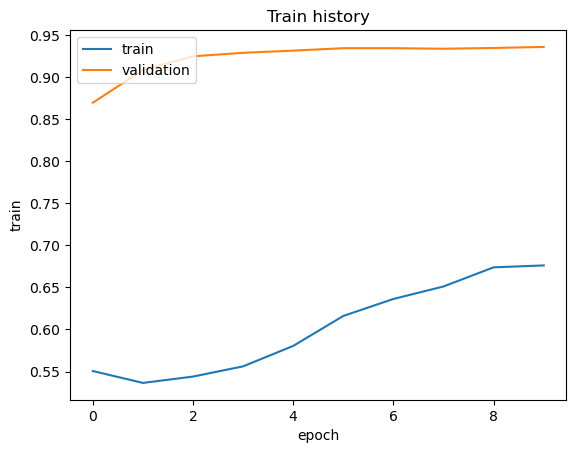

In [39]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')

In [41]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy',scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.6029 - accuracy: 0.9338

accuracy 0.9337999820709229


In [46]:
model = Sequential()

model(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))


# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=20,batch_size=200,verbose=2)

Epoch 1/20
240/240 - 5s - loss: 0.5823 - accuracy: 0.8154 - val_loss: 0.2225 - val_accuracy: 0.9358 - 5s/epoch - 20ms/step
Epoch 2/20
240/240 - 3s - loss: 0.3407 - accuracy: 0.8952 - val_loss: 0.1544 - val_accuracy: 0.9572 - 3s/epoch - 14ms/step
Epoch 3/20
240/240 - 3s - loss: 0.2677 - accuracy: 0.9171 - val_loss: 0.1312 - val_accuracy: 0.9625 - 3s/epoch - 13ms/step
Epoch 4/20
240/240 - 3s - loss: 0.2282 - accuracy: 0.9291 - val_loss: 0.1162 - val_accuracy: 0.9656 - 3s/epoch - 13ms/step
Epoch 5/20
240/240 - 3s - loss: 0.2061 - accuracy: 0.9349 - val_loss: 0.1025 - val_accuracy: 0.9707 - 3s/epoch - 14ms/step
Epoch 6/20
240/240 - 4s - loss: 0.1832 - accuracy: 0.9421 - val_loss: 0.0974 - val_accuracy: 0.9693 - 4s/epoch - 15ms/step
Epoch 7/20
240/240 - 3s - loss: 0.1766 - accuracy: 0.9435 - val_loss: 0.0930 - val_accuracy: 0.9716 - 3s/epoch - 14ms/step
Epoch 8/20
240/240 - 4s - loss: 0.1613 - accuracy: 0.9492 - val_loss: 0.0858 - val_accuracy: 0.9727 - 4s/epoch - 15ms/step
Epoch 9/20
240/2

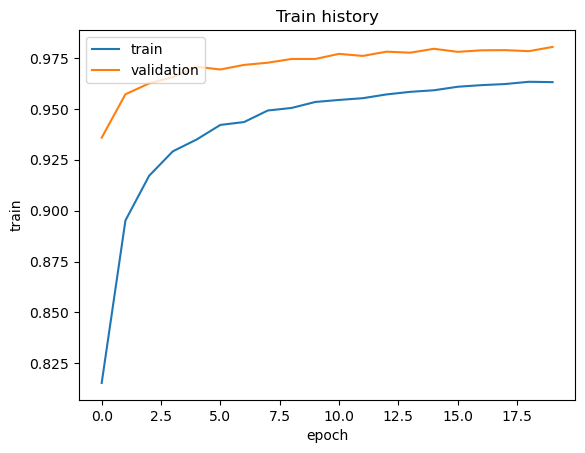

313/313 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9820

accuracy 0.9819999933242798
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         multiple                  0         
                                                                 
 dense_13 (Dense)            multiple                  785000    
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 dense_14 (Dense)            multiple                  10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
show_train_history(train_history,'accuracy','val_accuracy')

scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy',scores[1])

print(model.summary())